# Marketing for Yandex

In [1]:
#import the libraries necessaries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read all the libraries and assign them to a variable for easy access
visits_log = '/datasets/visits_log_us.csv'
orders_log = '/datasets/orders_log_us.csv'
costs_log = '/datasets/costs_us.csv'

The following code will clean the 'visits' dataset

In [3]:
#Read library visits
visits = pd.read_csv(visits_log)

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/visits_log_us.csv'

In [ ]:
#Print the information of the dataset
visits.info()
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   99696948200

In [ ]:
#Change the datatpye of the start ts
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

Changed the datatype for 'Start Ts' and 'End Ts' as this column will be used later on to track the number of users per day, per week and per month.

In [ ]:
#Check for any missing values in the dataset to be replaced or filled in
visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

There are no null values in the dataset.

In [ ]:
#check for duplicates in the dataset
print(visits.duplicated().sum())

0


There are no duplicate values in the dataset.

The following code will clean the 'orders' dataset.

In [ ]:
#Read library visits
orders = pd.read_csv(orders_log)

In [ ]:
#Print the information of the dataset
orders.info()
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [ ]:
#Change the datatype of buy Ts 
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

Change the datatype of 'Buy Ts'

In [ ]:
#Check for any missing values in the dataset to be replaced or filled in
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

There are no null values in the dataset.

In [ ]:
#check for duplicates in the dataset
print(orders.duplicated().sum())

0


There are no duplicate values in the dataset.

The following code will clean the 'costs' dataset

In [ ]:
#Read library costs
costs = pd.read_csv(costs_log)

In [ ]:
#Print the information of the dataset
costs.info()
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


All the columns seem to be on the correct data type, therefor no changes need to be made.

In [ ]:
#Check for any missing values in the dataset to be replaced or filled in
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

There are no null values in the dataset.

In [ ]:
#check for duplicates in the dataset
print(costs.duplicated().sum())

0


There are no duplicate values in the dataset.

# Reports on Products

1. Number of Uses per Day/Week/Month

In [ ]:
#Number of people that use the product everyday, week and month.
daily_users = visits.resample('D', on='Start Ts')['Uid'].nunique()
weekly_users = visits.resample('W', on='Start Ts')['Uid'].nunique()
monthly_users = visits.resample('M', on='Start Ts')['Uid'].nunique()

daily_users_head = daily_users.head(10)
weekly_users_head = weekly_users.head(10)
monthly_users_head = monthly_users.head(10)

daily_users_head, weekly_users_head, monthly_users_head

(Start Ts
 2017-06-01    605
 2017-06-02    608
 2017-06-03    445
 2017-06-04    476
 2017-06-05    820
 2017-06-06    797
 2017-06-07    699
 2017-06-08    868
 2017-06-09    695
 2017-06-10    350
 Freq: D, Name: Uid, dtype: int64,
 Start Ts
 2017-06-04    2021
 2017-06-11    4129
 2017-06-18    2812
 2017-06-25    2878
 2017-07-02    3064
 2017-07-09    3294
 2017-07-16    4355
 2017-07-23    3841
 2017-07-30    2655
 2017-08-06    2364
 Freq: W-SUN, Name: Uid, dtype: int64,
 Start Ts
 2017-06-30    13259
 2017-07-31    14183
 2017-08-31    11631
 2017-09-30    18975
 2017-10-31    29692
 2017-11-30    32797
 2017-12-31    31557
 2018-01-31    28716
 2018-02-28    28749
 2018-03-31    27473
 Freq: M, Name: Uid, dtype: int64)

Depending on the information we are looking for, we can find the number people using the service for each day, week or month.

2. Sessions per Day

In [ ]:
#Number of sessions per day (including the non unique ones)
daily_sessions = visits.resample('D', on='Start Ts').size()

print(daily_sessions.head(10))

Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
Freq: D, dtype: int64


The number of sessions have increased compare to the number of people using the product, most likely due to people using the service more than once a day, or even more times.

3. Length of Each Session

In [ ]:
#The following are the length of each sessions per user
visits['Session Duration'] = visits['End Ts'] - visits['Start Ts']

visits['Session Duration (minutes)'] = visits['Session Duration'].dt.total_seconds() / 60

session_duration_head = visits[['End Ts', 'Session Duration', 'Session Duration (minutes)']].head(10)

print(session_duration_head)

               End Ts Session Duration  Session Duration (minutes)
0 2017-12-20 17:38:00  0 days 00:18:00                        18.0
1 2018-02-19 17:21:00  0 days 00:28:00                        28.0
2 2017-07-01 01:54:00  0 days 00:00:00                         0.0
3 2018-05-20 11:23:00  0 days 00:24:00                        24.0
4 2017-12-27 14:06:00  0 days 00:00:00                         0.0
5 2017-09-03 21:36:00  0 days 00:01:00                         1.0
6 2018-01-30 12:09:00  0 days 00:56:00                        56.0
7 2017-11-05 15:15:00  0 days 00:01:00                         1.0
8 2017-07-19 10:44:00  0 days 00:03:00                         3.0
9 2017-11-08 13:43:00  0 days 00:01:00                         1.0


A new line was added to the dataset to be able to see the number of minutes each session lasted in minute.

4. User Retention Rate

In [ ]:
#The following is the retention rate table for the number of sessions
cohort_visits = visits.groupby('Uid')['End Ts'].min()
cohort_visits = cohort_visits.dt.to_period('M')

visits['Period'] = visits['Start Ts'].dt.to_period('M')

visits_df = visits.merge(cohort_visits.rename('Cohort'), on='Uid')

grouped = visits_df.groupby(['Cohort', 'Period'])
cohort_counts = grouped['Uid'].nunique()

retention_table = cohort_counts.unstack(0).divide(cohort_counts.groupby('Cohort').first(), axis=1)

print(retention_table)

Cohort    2017-06  2017-07  2017-08  2017-09   2017-10      2017-11  2017-12  \
Period                                                                         
2017-06  1.000000     1.00      NaN      NaN       NaN          NaN      NaN   
2017-07  0.078687  3284.00     1.00      NaN       NaN          NaN      NaN   
2017-08  0.053791   184.25  2544.25     1.00       NaN          NaN      NaN   
2017-09  0.061411   168.50   195.25  4174.50     1.000          NaN      NaN   
2017-10  0.068578   184.50   160.00   356.50  3246.625     1.000000      NaN   
2017-11  0.071445   191.25   159.75   289.00   254.750  4541.666667      1.0   
2017-12  0.060958   158.50   127.50   211.75   169.500   355.666667  12633.5   
2018-01  0.057714   149.25   112.00   164.50   126.500   200.333333    705.0   
2018-02  0.052282   150.50    92.50   157.75   111.375   175.666667    480.0   
2018-03  0.050849   127.50   100.50   149.75   104.625   153.166667    393.0   
2018-04  0.040664    94.00    71.00   10

# Sales

1. When people purchase

In [ ]:
#Find all the names of the columns inside the orders dataset
print(orders.columns)

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')


In [ ]:
#Take a look at the dataset to make sure it all looks good and check column names
print(orders.head())

               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450


In [ ]:
#The time it takes for customers to purchase the item
visits.set_index('Uid', inplace=True)

merged_df = pd.merge(orders, visits, on='Uid')

merged_df['Time to Buy (minutes)'] = (merged_df['Buy Ts'] - merged_df['Start Ts']).dt.total_seconds() / 60

result = merged_df[['Uid', 'Buy Ts', 'Start Ts', 'Time to Buy (minutes)']].sample(10)
result

,Uid,Buy Ts,Start Ts,Time to Buy (minutes)
392339,17423046801936755730,2017-07-05 13:32:00,2017-07-05 13:29:00,3.0
481560,10246903932085021612,2017-10-05 11:22:00,2018-01-12 13:35:00,-142693.0
603669,10343016064897450067,2017-12-24 14:23:00,2018-05-08 14:25:00,-194402.0
341357,9019681082555518724,2018-02-24 18:47:00,2017-10-21 23:05:00,181182.0
250396,3263486045884611639,2017-12-21 09:02:00,2017-12-28 12:58:00,-10316.0
167405,13888745432979765063,2017-08-09 16:26:00,2017-12-24 15:34:00,-197228.0
310081,6268987037334934184,2017-06-13 07:46:00,2017-06-09 08:50:00,5696.0
102986,11920452646463905188,2017-09-29 12:57:00,2018-04-04 12:50:00,-269273.0
429082,17524370468859157580,2017-08-27 09:31:00,2017-11-24 11:55:00,-128304.0
637221,13600301017256065138,2017-12-27 16:44:00,2018-04-28 10:03:00,-175279.0


Some customers are purchasing the item before they even start their session, it could be due to special sales being advertise to them and they fear on missing out.

2. Number of orders

In [ ]:
#Add a new column for the number of orders
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

orders['Order Date'] = orders['Buy Ts'].dt.date

daily_orders = orders.groupby(['Uid', 'Order Date']).size().reset_index(name='Order Count')

print(daily_orders.sample(10))

                        Uid  Order Date  Order Count
33303  13068105149228630746  2017-11-13            1
12793   5026283212634598376  2018-02-10            1
45715  18122312397823794985  2017-11-08            1
42026  16570861291974356761  2018-05-06            1
26812  10494004179126182990  2018-05-23            1
38896  15243274671928905119  2018-03-17            1
14078   5488715539254849421  2017-12-08            1
45222  17925442416826204434  2018-03-05            2
33451  13128211139399361870  2017-11-22            1
32987  12936810018098123677  2017-12-26            1


Commonly we see that customers place one order and sometimes 2 or even up to 4.

3. Average purchase size

In [ ]:
#Find out the average number of orders per customer
orders['Revenue'] = pd.to_numeric(orders['Revenue'], errors='coerce')

average_purchase_size = orders['Revenue'].mean()

print(average_purchase_size)

4.999646930477041


It seems like the average purchase size is almost 5 per customer which is really good. It might all come down to the amount/value of the purchase.

4. Revenue this brings in

In [ ]:
orders['Revenue'] = pd.to_numeric(orders['Revenue'], errors='coerce')

total_revenue = orders['Revenue'].sum()

print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $252057.20


# Marketing

1. Money spent

In [ ]:
#Find the name of the colums
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [ ]:
#Cost of advertising
costs['costs'] = pd.to_numeric(costs['costs'], errors='coerce')

total_costs = costs['costs'].sum()

print(f"Total Costs: ${total_costs:.2f}")

Total Costs: $329131.62


The total cost of the advertising is greater than the revenue. This could be a bad thing.

2. Acquisition cost per source

In [ ]:
#Find the total cost for each source
costs['costs'] = pd.to_numeric(costs['costs'], errors='coerce')

total_costs_by_source = costs.groupby('source_id')['costs'].sum()

print(total_costs_by_source)

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


The source with the highest acquisition cost is the 3rd one. 

3. ROI (Return on investment)

In [ ]:
#Calculate the costs of the revenue
total_investment = costs['costs'].sum()
print("\nTotal Investment: $", total_investment)


Total Investment: $ 329131.62


In [ ]:
#calculate the revenue
total_returns = orders['Revenue'].sum()
print("Total Returns: $", total_returns)

Total Returns: $ 252057.19999999998


In [ ]:
#Calculate the roi
roi = ((total_returns - total_investment) / total_investment) * 100
print("ROI: {:.2f}%".format(roi))

ROI: -23.42%


The ROI seems to be -23.42% which is not a good number considering its been on business for a few years now.

# Graphs for a better metrics understanding

In [ ]:
#Group the data by devices and source for graphing
costs_aggregated = costs.groupby(['source_id', 'dt']).agg({'costs': 'sum'}).reset_index()


In [ ]:
#aggregate the order data by date
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders_aggregated = orders.groupby(orders['Buy Ts'].dt.date).agg({'Revenue': 'sum', 'Uid': 'count'}).rename(columns={'Uid': 'Orders'}).reset_index()

In [ ]:
#aggregate visits data by device, source, and date
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits_aggregated = visits.groupby([visits['Start Ts'].dt.date, 'Device', 'Source Id']).size().reset_index(name='Visits')

In [ ]:
#convert daily dates to monthly data for better plotting
costs['dt'] = pd.to_datetime(costs['dt'])
costs_monthly_aggregated = costs.groupby([costs['dt'].dt.to_period('M'), 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_monthly_aggregated['dt'] = costs_monthly_aggregated['dt'].dt.to_timestamp()

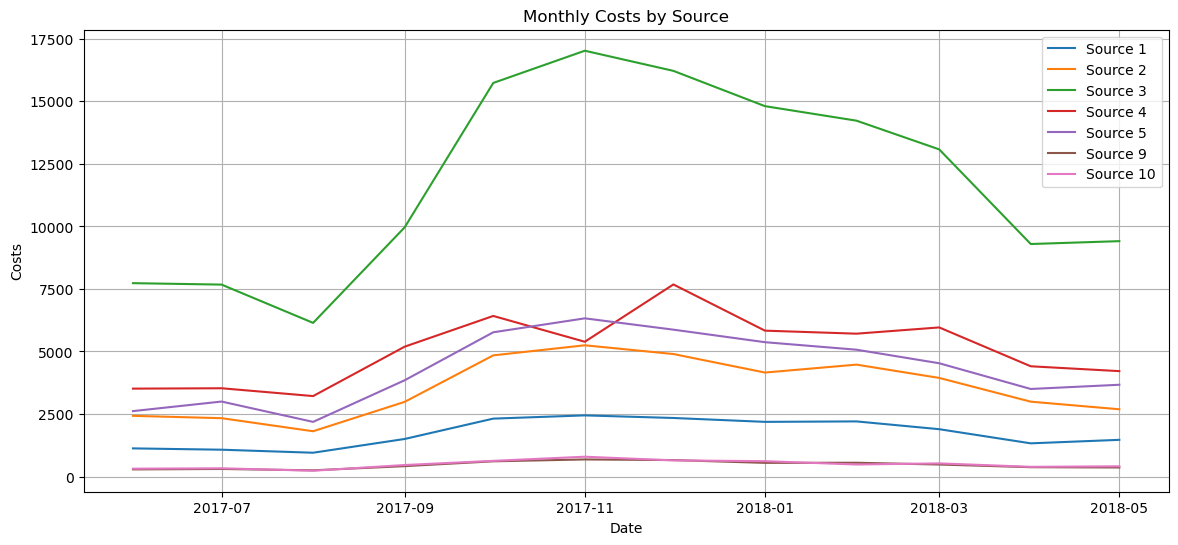

In [ ]:
#Plot cost by source
plt.figure(figsize=(14, 6))
for source in costs_monthly_aggregated['source_id'].unique():
    subset = costs_monthly_aggregated[costs_monthly_aggregated['source_id'] == source]
    plt.plot(subset['dt'], subset['costs'], label=f'Source {source}')
plt.title('Monthly Costs by Source')
plt.xlabel('Date')
plt.ylabel('Costs')
plt.legend()
plt.grid(True)
plt.show()

It seems like cost for the 3rd source increased after the month of September all the way until April. Could be a seasonal thing. 

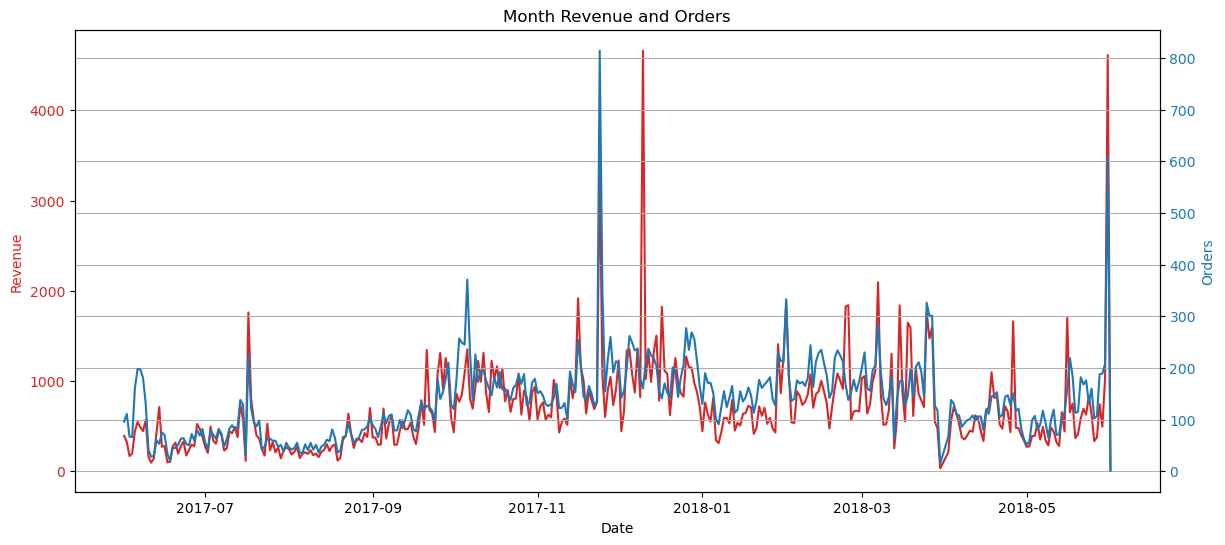

In [ ]:
#Plot revenue and orders
fig, ax1 = plt.subplots(figsize=(14, 6))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color=color)
ax1.plot(orders_aggregated['Buy Ts'], orders_aggregated['Revenue'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Orders', color=color)
ax2.plot(orders_aggregated['Buy Ts'], orders_aggregated['Orders'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Month Revenue and Orders')
plt.grid(True)
plt.show()


Everything looks consistent and random spikes here and there until we see the month of december, maybe a really famous artists released a new album and everyone wanted to listen to it and there for purchase the subscription.

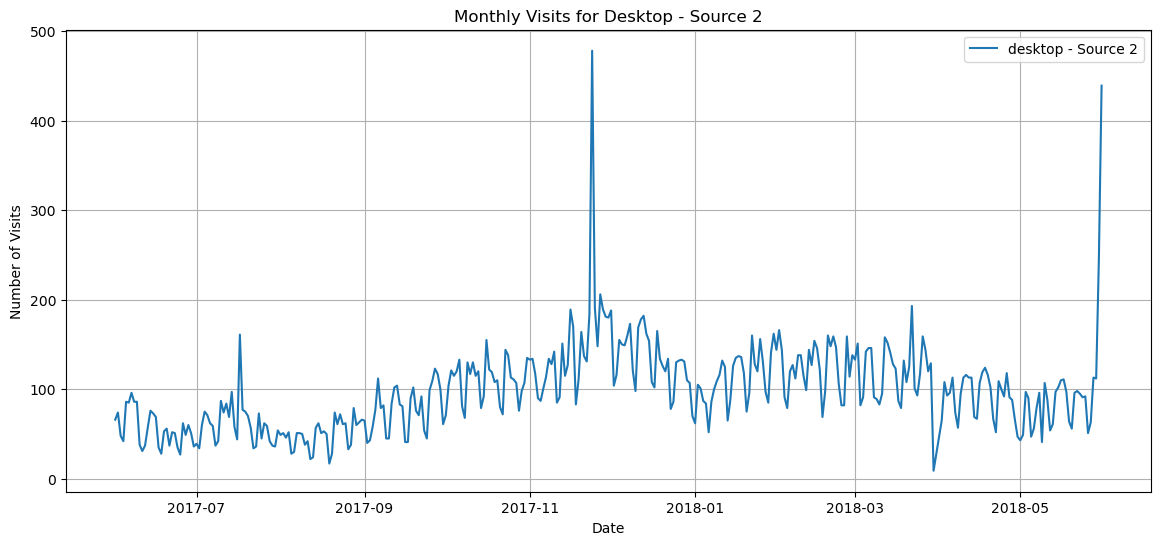

In [ ]:
#plot visits for desktop and source over time
device_example = 'desktop'
source_example = 2
visits_subset = visits_aggregated[(visits_aggregated['Device'] == device_example) & (visits_aggregated['Source Id'] == source_example)]
plt.figure(figsize=(14, 6))
plt.plot(visits_subset['Start Ts'], visits_subset['Visits'], label=f'{device_example} - Source {source_example}')
plt.title(f'Monthly Visits for {device_example.capitalize()} - Source {source_example}')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

In general the month of december seem to be one of the months in which more people pay for the services on desktop.

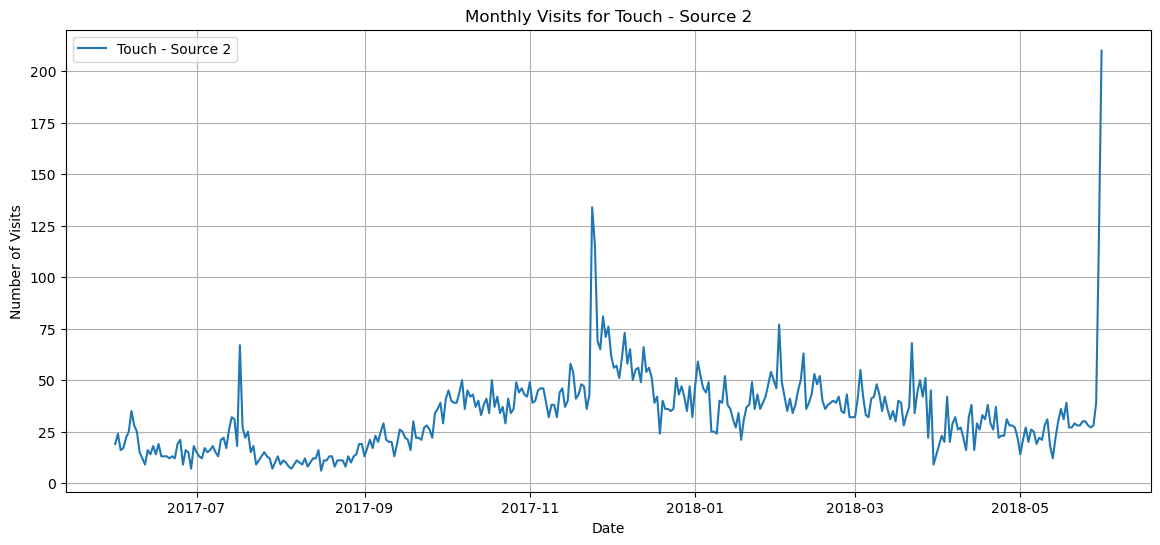

In [ ]:
#plot visits for touch and source over time
device_example = 'touch'
source_example = 2
visits_subset_touch = visits_aggregated[(visits_aggregated['Device'] == device_example) & (visits_aggregated['Source Id'] == source_example)]

# Plotting Daily Visits for Touch - Source 2
plt.figure(figsize=(14, 6))
plt.plot(visits_subset_touch['Start Ts'], visits_subset_touch['Visits'], label=f'{device_example.capitalize()} - Source {source_example}')
plt.title(f'Monthly Visits for {device_example.capitalize()} - Source {source_example}')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

In touch devices such as phones, ipad and others. The month of december is also a high demand for the service this could be due to gifts or present being given for christmas.

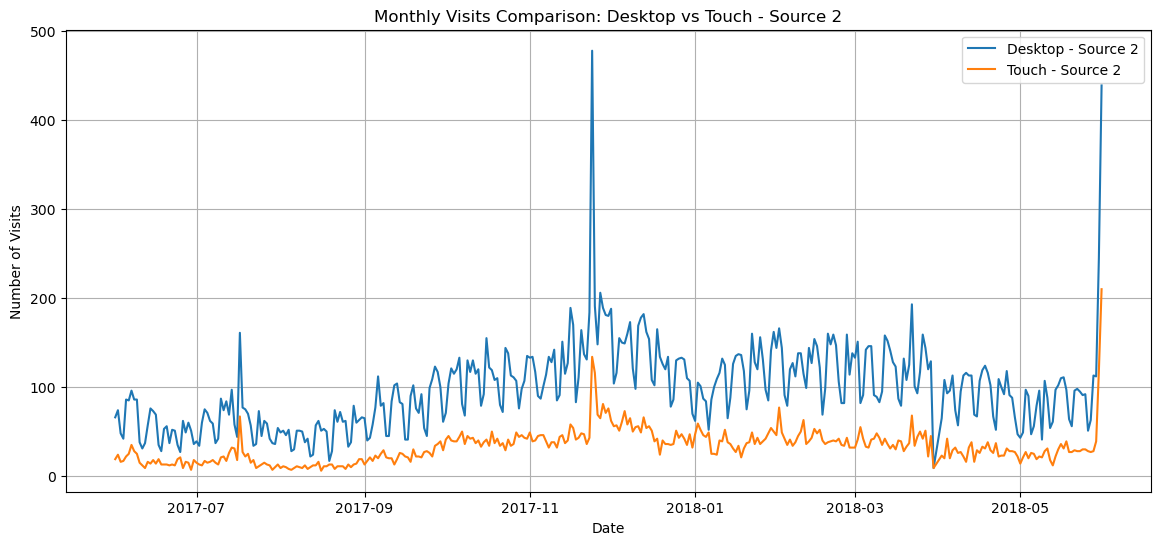

In [ ]:
#Combine both graphs into one for a better comparison from one to the other
source_example = 2
device_desktop = 'desktop'
device_touch = 'touch'

visits_subset_desktop = visits_aggregated[(visits_aggregated['Device'] == device_desktop) & (visits_aggregated['Source Id'] == source_example)]
visits_subset_touch = visits_aggregated[(visits_aggregated['Device'] == device_touch) & (visits_aggregated['Source Id'] == source_example)]

plt.figure(figsize=(14, 6))
plt.plot(visits_subset_desktop['Start Ts'], visits_subset_desktop['Visits'], label='Desktop - Source 2')
plt.plot(visits_subset_touch['Start Ts'], visits_subset_touch['Visits'], label='Touch - Source 2')
plt.title('Monthly Visits Comparison: Desktop vs Touch - Source 2')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

Comparing desktop to touch, the difference in purchases made per day are very noticeable as touch only meets with desktop at one point and its only due to desktop not making enough sales instead of touch sales increasing.

# Conclusions

If we take a look at the following

In [ ]:
december_costs = costs[costs['dt'].dt.month == 12]

total_december_costs = december_costs['costs'].sum()

print("Total advertising costs in December:", total_december_costs)

Total advertising costs in December: 38315.35


In [ ]:
december_orders = orders[orders['Buy Ts'].dt.month == 12]

total_december_revenue = december_orders['Revenue'].sum()

print("Total revenue in December:", total_december_revenue)

Total revenue in December: 36388.6


In [ ]:
total_december_costs = 36388.6
total_december_revenue = 38315.35

profit_margin = 0.10

desired_revenue = total_december_revenue * (1 + profit_margin)

roi = (total_december_revenue - total_december_costs) / total_december_costs

require_investment = desired_revenue / (1 + roi)

print(require_investment)


40027.46


1. When to invest

According to our calculations, in order to make a profit of only 10% on the month of december. We need ot invest a total of $40027.46 as this is our most profitable month time of the year, this could easily happen. 

Althought touch and desktop make the company, desktop is the most profitable one. In this case, targeting users on desktop would be a better idea to increase sales.

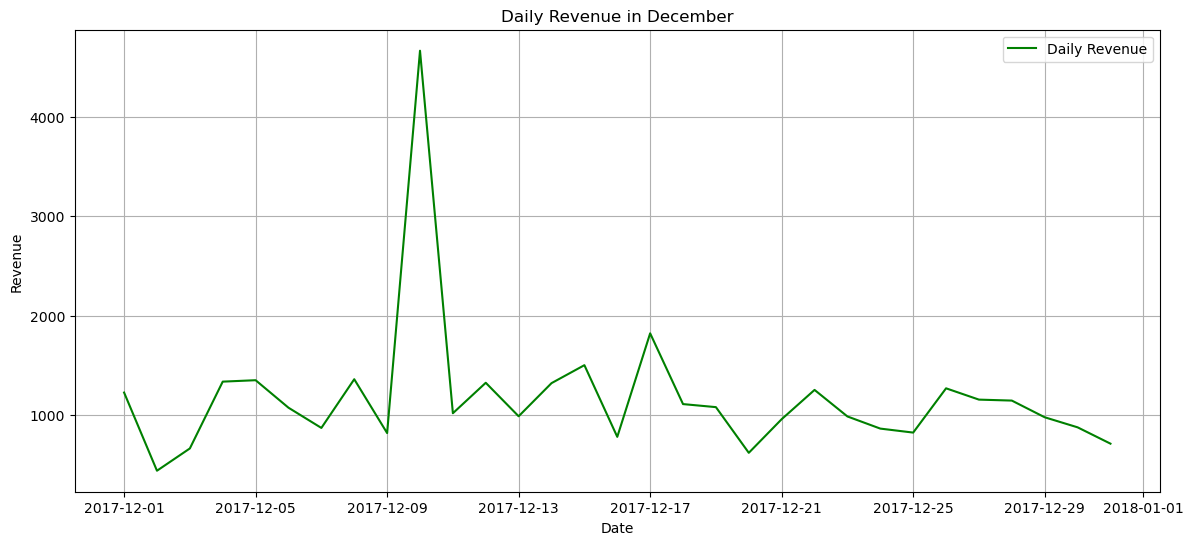

In [ ]:
#Print a graph for revenue on the month of december
december_orders = orders[orders['Buy Ts'].dt.month == 12]
december_orders_daily = december_orders.groupby(december_orders['Buy Ts'].dt.date).agg({'Revenue': 'sum'}).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(december_orders_daily['Buy Ts'], december_orders_daily['Revenue'], label='Daily Revenue', color='green')
plt.title('Daily Revenue in December')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

If we take a look at the previous graph, the month of december we have a big spike in purchases. Which could be a sale or special yandex was running since christmas was coming soon. Therefor during this month more promotions or more creative ways of advertising should be published and pushed out to the public.